In [1]:
%matplotlib inline

import Bayesian_Particle_Tracking
from Bayesian_Particle_Tracking import model
from Bayesian_Particle_Tracking.model import log_likelihood, log_posterior, log_prior, diffusion
from Bayesian_Particle_Tracking import io
from Bayesian_Particle_Tracking.prior import JeffreysPrior, UniformPrior
from Bayesian_Particle_Tracking.printable import Printable
from Bayesian_Particle_Tracking import generate_data
from Bayesian_Particle_Tracking.generate_data import data_generation, generator
import emcee
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

/Users/alanzhou/anaconda3/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [23]:
data = Bayesian_Particle_Tracking.generate_data.generator(1000,10**(-8),10**(-10),[0,0,0], parameter = "D")
np.save('test_dataD', data)
test_data = io.get_example_model('test_dataD.npy')

In [26]:
test_data

diffusion(data=array([[  2.84538539e-06,  -3.32682691e-06,   3.43207616e-05,
          1.00000000e-08,   1.00000000e+00],
       [  1.07738309e-05,  -1.06189263e-05,   1.13378022e-05,
          1.00000000e-08,   1.00000000e+00],
       [  8.90168871e-06,  -1.07353112e-05,   2.52874181e-06,
          1.00000000e-08,   1.00000000e+00],
       ..., 
       [  3.29905039e-04,   5.55736794e-04,   7.83810708e-04,
          1.00000000e-08,   1.00000000e+00],
       [  3.31781039e-04,   5.54605392e-04,   7.88152266e-04,
          1.00000000e-08,   1.00000000e+00],
       [  3.50048417e-04,   5.37333454e-04,   8.32761838e-04,
          1.00000000e-08,   1.00000000e+00]]))

In [27]:
#the model has 1 parameter; we'll use 40 walkers and 500 steps
ndim = 1
nwalkers = 40
nsteps = 500

starting_positions = [abs(1e-10 + 1e-10*np.random.randn(ndim)) for i in range(nwalkers)]

# set up the sampler object
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, 
                                args=[test_data])
# run the sampler. We use iPython's %time directive to tell us 
# how long it took (in a script, you would leave out "%time")
%time sampler.run_mcmc(starting_positions, nsteps)
print('Done')

CPU times: user 2.45 s, sys: 15.4 ms, total: 2.47 s
Wall time: 2.49 s
Done


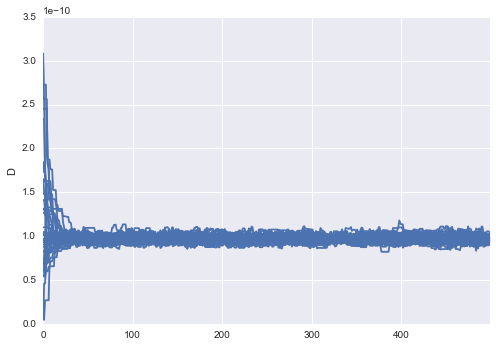

In [28]:
fig, (ax_D) = plt.subplots(1)
ax_D.set(ylabel='D')
for i in range(nwalkers):
    sns.tsplot(sampler.chain[i,:,0], ax=ax_D)

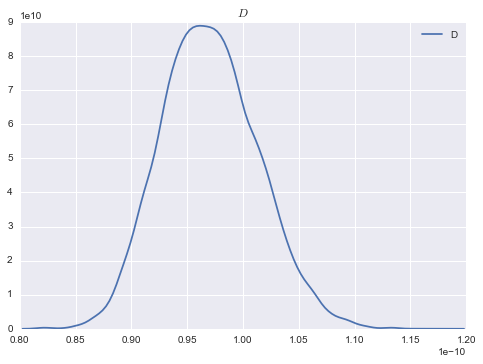

In [29]:
samples = sampler.chain[:,50:,:]
# reshape the samples into a 1D array where the column is D
traces = samples.reshape(-1, ndim).T
# create a pandas DataFrame with labels. 
parameter_samples = pd.DataFrame({'D': traces[0]})
sns.kdeplot(parameter_samples['D'])
plt.title('$D$')

In [30]:
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

print("D = {:.3e} + {:.3e} - {:.3e}".format(q['D'][0.50], 
                                            q['D'][0.84]-q['D'][0.50],
                                            q['D'][0.50]-q['D'][0.16]))

D = 9.684e-11 + 4.542e-12 - 4.076e-12


9.65150068751e-11
9.67085461935e-11


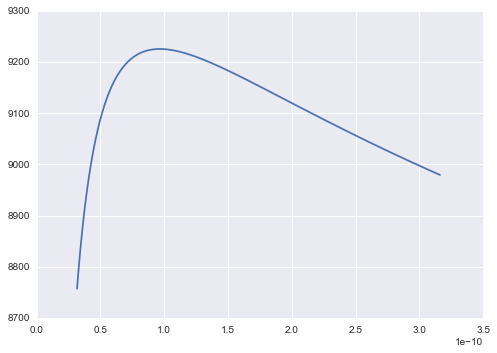

In [31]:
D = np.logspace(-10.5, -9.5, 100000)
logpriorD = np.array(list(map(log_prior,D)))
loglikelihoodD = np.array(list(map(lambda d: log_likelihood(d, test_data), D)))
logposteriorD = logpriorD + loglikelihoodD
plt.plot(D, logposteriorD)
maxindex = [np.max(logposteriorD)==logposteriorD]
np.argmax(logposteriorD)
print(D[np.argmax(logposteriorD)])
print(D[np.argmax(loglikelihoodD)])

In [8]:
home_dir = "/Users/alanzhou/Documents/Physics_201/final_project/"

trajectory_dataframe = pd.read_pickle('/Users/alanzhou/Documents/Physics_201/final_project/160408,_e_coli_and_tracers_in_droplets_viva_pickled,_tracked_by_ZCC,_filtered_data_with_drift_subtracted_pickled.pkl')

In [19]:
log_likelihood(2e-10,test_data_original)dd

8817.1403404081266

In [22]:
nsteps, sigma, mu, a, initial_coordinate = 100, 1, 1, 1, (0,0,0)
test_data = generate_data.generator(nsteps, sigma, (mu, a), initial_coordinate, ndim = 2)
test_data.shape[1]

3

In [27]:
test_data

diffusion(data=array([[  2.84538539e-06,  -3.32682691e-06,   3.43207616e-05,
          1.00000000e-08,   1.00000000e+00],
       [  1.07738309e-05,  -1.06189263e-05,   1.13378022e-05,
          1.00000000e-08,   1.00000000e+00],
       [  8.90168871e-06,  -1.07353112e-05,   2.52874181e-06,
          1.00000000e-08,   1.00000000e+00],
       ..., 
       [  3.29905039e-04,   5.55736794e-04,   7.83810708e-04,
          1.00000000e-08,   1.00000000e+00],
       [  3.31781039e-04,   5.54605392e-04,   7.88152266e-04,
          1.00000000e-08,   1.00000000e+00],
       [  3.50048417e-04,   5.37333454e-04,   8.32761838e-04,
          1.00000000e-08,   1.00000000e+00]]))